In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

#to filter certain warnings
import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"

# Importing the data

In [3]:
#import from csv 
data= pd.read_csv("winequality-red.csv", sep=";") 
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
X = data.drop('quality',axis=1)
y = data['quality']

# Understanding, Cleaning, and Preprocessing the Data

In [5]:
#check for null instances
data = data.fillna(0)
print("\nChecking for null values after using fillna(): \n")
data.isna().sum()


Checking for null values after using fillna(): 



fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

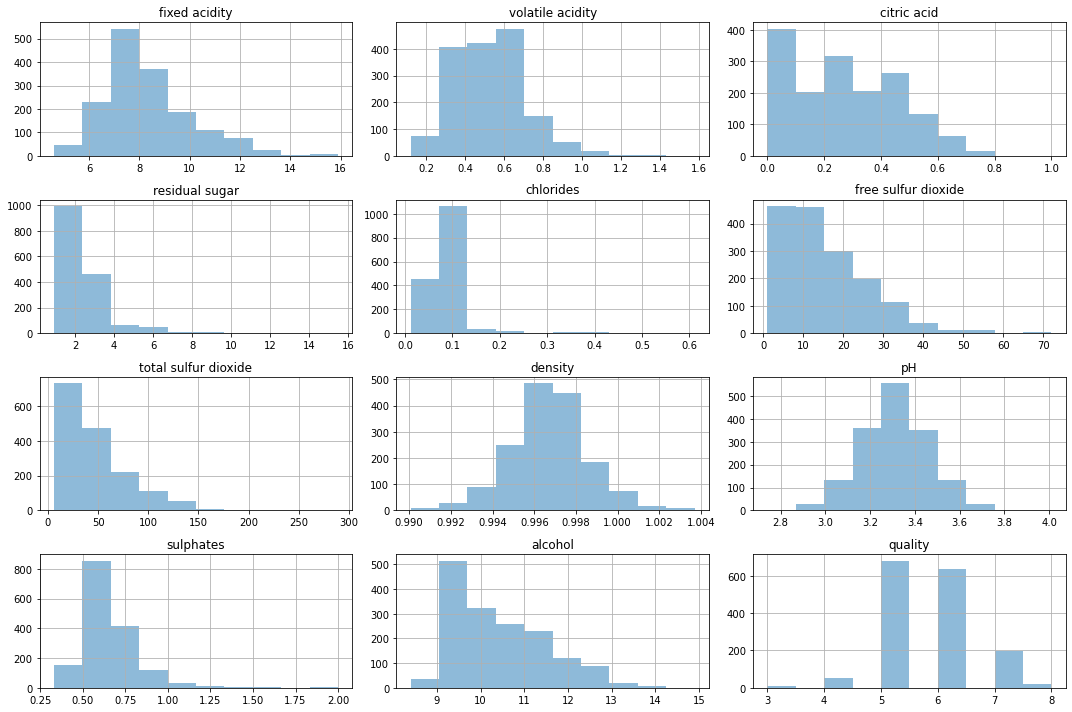

In [6]:
#plot histogram of each variable
data.hist(alpha=0.5, figsize=(15, 10))
plt.tight_layout()
plt.show()

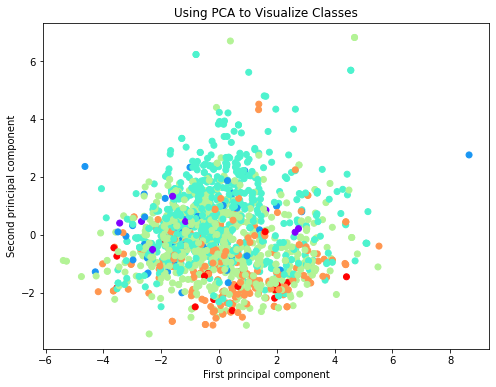

In [7]:
df_pca = data.copy()
X_pca = df_pca.drop('quality',axis=1)
y_pca = df_pca['quality']

X_pca.tail()
X_pca = StandardScaler().fit_transform(X_pca)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_pca)
X_pca.shape

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y_pca,cmap='rainbow')
plt.title('Using PCA to Visualize Classes')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()

In [8]:
print("components: ", pca.components_, "\n")
print("explained variance: ", pca.explained_variance_, "\n")
exp_var_rat = pca.explained_variance_ratio_
print("explained variance ratio: ", exp_var_rat)

components:  [[ 0.48931422 -0.23858436  0.46363166  0.14610715  0.21224658 -0.03615752
   0.02357485  0.39535301 -0.43851962  0.24292133 -0.11323206]
 [-0.11050274  0.27493048 -0.15179136  0.27208024  0.14805156  0.51356681
   0.56948696  0.23357549  0.00671079 -0.03755392 -0.38618096]] 

explained variance:  [3.10107182 1.92711489] 

explained variance ratio:  [0.28173931 0.1750827 ]


In [9]:
X_f = data.loc[:, 'fixed acidity':'alcohol']
y_f = data['quality']

#apply SelectKBest class to extract top best features
bestFeatures = SelectKBest(score_func=chi2, k=11)
bestFeaturesFit = bestFeatures.fit(X_f,y_f)
dfscores = pd.DataFrame(bestFeaturesFit.scores_)  #Store predictor scores in a column 
dfcolumns = pd.DataFrame(X_f.columns)  #Store predictor variable names in a column

# #concatenate scores with predictor names
predScores = pd.concat([dfcolumns,dfscores],axis=1)
predScores.columns = ['Predictor','Score']   #naming the dataframe columns
print(predScores.nlargest(11,'Score'))       #print top (by score) 10 features

               Predictor        Score
6   total sulfur dioxide  2755.557984
5    free sulfur dioxide   161.936036
10               alcohol    46.429892
1       volatile acidity    15.580289
2            citric acid    13.025665
0          fixed acidity    11.260652
9              sulphates     4.558488
3         residual sugar     4.123295
4              chlorides     0.752426
8                     pH     0.154655
7                density     0.000230


In [10]:
#Drop the bottom two features (smallest score)
data = data.drop('density', axis=1)
data = data.drop('pH', axis=1)

# Select data (ignore certain features)
X = data.loc[:, 'fixed acidity':'alcohol']
y = data['quality']

<AxesSubplot:>

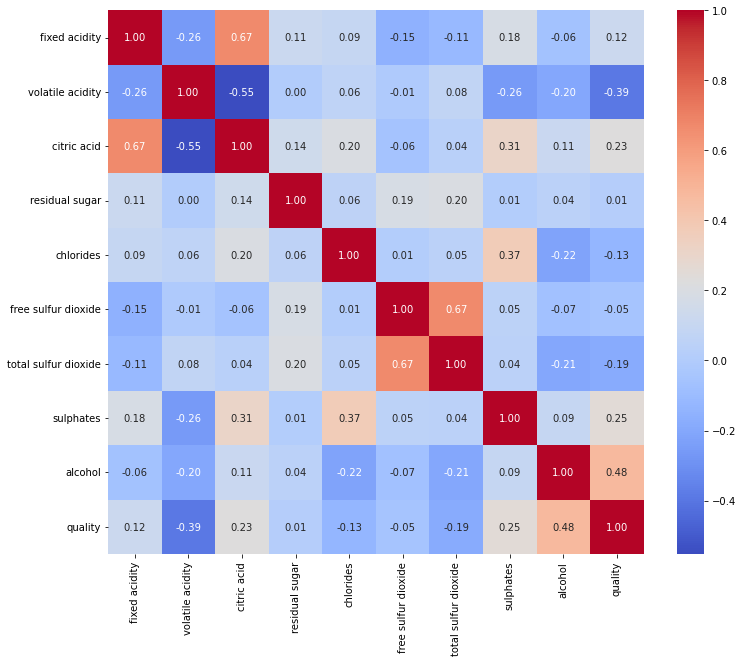

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True, cmap='coolwarm',fmt='.2f')

In [12]:
# split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=420)

# Run Classification Algorithms on the Cleaned Data

### ANN Classification - Tuning hyperparams with GridSearchCV

In [12]:
param_grid = {
    #'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'hidden_layer_sizes': [(20,), (100,),(300,)], #add more
    'max_iter': [500,1000],
    'activation': ['logistic','tanh'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    #'learning_rate': ['constant','adaptive'],
}
mlp_clf = MLPClassifier()
grid_ANN = GridSearchCV(mlp_clf, param_grid, n_jobs= -1, cv=5)
grid_ANN.fit(X_train, y_train)

print(grid_ANN.best_params_)

{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'max_iter': 500, 'solver': 'adam'}


In [13]:
grid_ANN_pred = grid_ANN.predict(X_test)

print('Accuracy ANN: {}'.format(accuracy_score(y_test, grid_ANN_pred)))

Accuracy ANN: 0.59375


Best params {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'max_iter': 500, 'solver': 'adam'}
Classification report ANN: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         9
           5       0.70      0.62      0.66       203
           6       0.53      0.66      0.59       197
           7       0.55      0.48      0.51        60
           8       0.00      0.00      0.00        10

    accuracy                           0.59       480
   macro avg       0.30      0.29      0.29       480
weighted avg       0.58      0.59      0.58       480



C:\Users\lpest\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lpest\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lpest\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


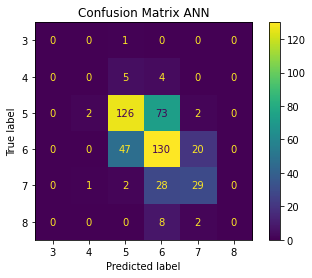

In [14]:
best_estimate_ANN=grid_ANN.best_estimator_ #get the best estimate from gridsearch
print("Best params {}".format(grid_ANN.best_params_)) #print out best tuned hyperparams

clas_grid_ANN = classification_report(y_test, grid_ANN_pred)
print("Classification report ANN: \n", clas_grid_ANN)

ConfusionMatrixDisplay.from_estimator(best_estimate_ANN, X_test, y_test) #show confusion matrix against test
plt.title("Confusion Matrix ANN")
plt.grid(False)
plt.show()

### Random Forest Classification - Tuning hyperparameters with GridSearchCV

In [15]:
parameters = {
     'n_estimators': [100, 200, 400, 500, 700],
    'max_depth': [5,8,12,20]} 
rand_forest = RandomForestClassifier() #create the classifier
grid_RF = GridSearchCV(rand_forest, parameters) #run grid search to tune hyperparams

grid_RF.fit(X_train,y_train); #fit the tuned model

print("Best params {}".format(grid_RF.best_params_)) #print out best tuned hyperparams

Best params {'max_depth': 20, 'n_estimators': 200}


In [16]:
grid_RF_pred = grid_RF.predict(X_test)
print('Accuracy for Random Forest:{}'.format(accuracy_score(y_test, grid_RF_pred)))

Accuracy for Random Forest:0.7020833333333333


Best params {'max_depth': 20, 'n_estimators': 200}
Classification report RF: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         9
           5       0.76      0.77      0.76       203
           6       0.65      0.74      0.69       197
           7       0.71      0.60      0.65        60
           8       0.00      0.00      0.00        10

    accuracy                           0.70       480
   macro avg       0.35      0.35      0.35       480
weighted avg       0.68      0.70      0.69       480



C:\Users\lpest\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lpest\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lpest\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


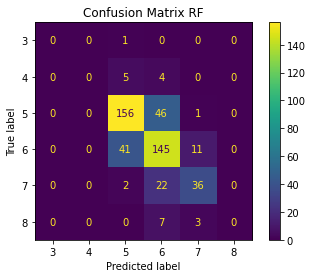

In [17]:
best_estimate_RF=grid_RF.best_estimator_ #get the best estimate from gridsearch
print("Best params {}".format(grid_RF.best_params_)) #print out best tuned hyperparams

clas_grid_RF = classification_report(y_test, grid_RF_pred)
print("Classification report RF: \n", clas_grid_RF)

ConfusionMatrixDisplay.from_estimator(best_estimate_RF, X_test, y_test) #show confusion matrix against test
plt.title("Confusion Matrix RF")
plt.grid(False)
plt.show()

Text(0, 0.5, 'Accuracy')

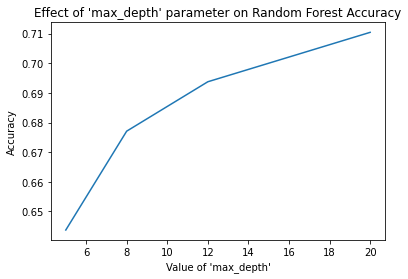

In [16]:
max_depths= [5,8,12,20]
scores = []

for m in max_depths:
    rfc = RandomForestClassifier(max_depth=m, n_estimators=200)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

plt.plot(max_depths, scores)
plt.title("Effect of 'max_depth' parameter on Random Forest Accuracy")
plt.xlabel("Value of 'max_depth'")
plt.ylabel("Accuracy")

### SVM Classification - Tuning hyperparameters with GridSearchCV

In [19]:
parameters = {
    'kernel': ['rbf','sigmoid','poly'], 
    'C': [1, 10, 100, 1000]
}

SVM = SVC()

grid_SVM = GridSearchCV(SVM, parameters)
grid_SVM.fit(X_train, y_train)

best_estimate_SVM=grid_SVM.best_estimator_ #get the best estimate from gridsearch
print("Best params SVM {}".format(grid_SVM.best_params_)) #print out best tuned hyperparams

Best params SVM {'C': 1000, 'kernel': 'rbf'}


Accuracy SVM:0.60625
Classification report SVM: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         9
           5       0.68      0.76      0.72       203
           6       0.55      0.64      0.59       197
           7       0.50      0.17      0.25        60
           8       0.00      0.00      0.00        10

    accuracy                           0.61       480
   macro avg       0.29      0.26      0.26       480
weighted avg       0.57      0.61      0.58       480



C:\Users\lpest\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lpest\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lpest\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


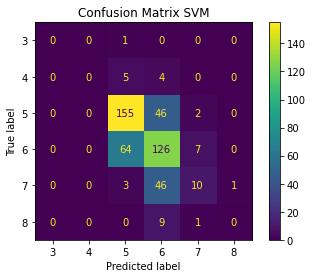

In [20]:
best_estimate_SVM.fit(X_train, y_train)

grid_SVM_pred = best_estimate_SVM.predict(X_test)
print('Accuracy SVM:{}'.format(accuracy_score(y_test, grid_SVM_pred)))

clas_grid_SVM = classification_report(y_test, grid_SVM_pred)
print("Classification report SVM: \n", clas_grid_SVM)

ConfusionMatrixDisplay.from_estimator(best_estimate_SVM, X_test, y_test) #show confusion matrix against test
plt.title("Confusion Matrix SVM")
plt.grid(False)
plt.show()

Text(0, 0.5, 'Accuracy')

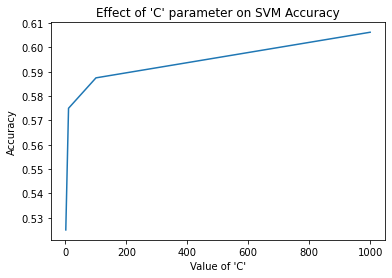

In [21]:
c_values = [1, 10, 100, 1000]
scores = []

for C in c_values:
    model = SVC(C=C, kernel='rbf')
    clf = model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

plt.plot(c_values, scores)
plt.title("Effect of 'C' parameter on SVM Accuracy")
plt.xlabel("Value of 'C'")
plt.ylabel("Accuracy")

### KNN Classification 

In [22]:
parameters={'n_neighbors':[1, 3, 5, 10, 25, 50, 80],
           'leaf_size':[10,20,30,40]}

knn_classifier=KNeighborsClassifier() #get classifier object


grid_KNN = GridSearchCV(knn_classifier,parameters) #grid search
grid_KNN.fit(X_train, y_train)  #fit that and save best params

best_estimate_KNN=grid_KNN.best_estimator_ #get the best estimate from gridsearch
print("Best params KNN {}".format(grid_KNN.best_params_)) #print out best tuned hyperparams    

Best params KNN {'leaf_size': 10, 'n_neighbors': 1}


Accuracy KNN:0.5708333333333333
Classification report KNN: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         9
           5       0.65      0.67      0.66       203
           6       0.58      0.56      0.57       197
           7       0.48      0.43      0.46        60
           8       0.00      0.00      0.00        10

    accuracy                           0.57       480
   macro avg       0.29      0.28      0.28       480
weighted avg       0.57      0.57      0.57       480



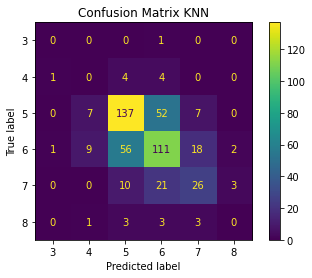

In [23]:
best_estimate_KNN.fit(X_train, y_train)

grid_KNN_pred = best_estimate_KNN.predict(X_test)
print('Accuracy KNN:{}'.format(accuracy_score(y_test, grid_KNN_pred)))

clas_grid_KNN = classification_report(y_test, grid_KNN_pred)
print("Classification report KNN: \n", clas_grid_KNN)

ConfusionMatrixDisplay.from_estimator(best_estimate_KNN, X_test, y_test) #show confusion matrix against test
plt.title("Confusion Matrix KNN")
plt.grid(False)
plt.show()

Text(0, 0.5, 'Accuracy')

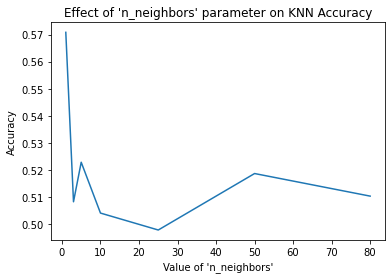

In [13]:
num_neighbors = [1, 3, 5, 10, 25, 50, 80]
scores = []

for k in num_neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, leaf_size=10)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

plt.plot(num_neighbors, scores)
plt.title("Effect of 'n_neighbors' parameter on KNN Accuracy")
plt.xlabel("Value of 'n_neighbors'")
plt.ylabel("Accuracy")